## Contexto

O custo dos medicamentos em um tratamento de saúde é um aspecto muito relevante em sua continuidade, o que impacta diretamente na sua efetividade. As farmácias e drogarias, assim como laboratórios, distribuidores e importadores, não podem cobrar pelos medicamentos preço acima do permitido pela CMED. A lista de preços máximos permitidos para a venda de medicamentos é disponibilizada para consulta dos consumidores e é atualizada mensalmente, esta será o objeto de estudo da análise. O objetivo é apresentar como os preços dos medicamentos estão distribuídos, a fim de verificar qual o impacto de um dado tratamento na renda do cidadão brasileiro. 

In [1]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# visualizando o dataset

dados = pd.read_csv('/content/TA_PRECO_MEDICAMENTO.csv',  sep=';', encoding='latin-1')
dados.head()

,SUBSTÂNCIA,CNPJ,LABORATÓRIO,CÓDIGO GGREM,REGISTRO,EAN 1,EAN 2,EAN 3,PRODUTO,APRESENTAÇÃO,...,PMC 18% ALC,PMC 20%,RESTRIÇÃO HOSPITALAR,CAP,CONFAZ 87,ICMS 0%,ANÁLISE RECURSAL,LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS),COMERCIALIZAÇÃO 2020,TARJA
0,SALICILATO DE FENILA;ÁCIDO SALICÍLICO;ÓXIDO DE...,33.379.884/0001-96,LABORATORIO SIMOES LTDA.,"5,20501E+14",57600510011,"7,89621E+12",-,-,TALCO ALÍVIO,TALQUEIRA C/ 100 G,...,"8,5","9,7",Não,Não,Não,Não,NaN,Negativa,Não,Tarja -(*)
1,DIENOGESTE;VALERATO DE ESTRADIOL,56.990.534/0001-67,SCHERING DO BRASIL QUÍMICA E FARMACÊUTICA LTDA,"5,30917E+14","1,002E+12","7,89612E+12",-,-,CHARMELIE,COM REV A + COM REV B + COM REV C + COM REV D ...,...,"163,25","186,12",Não,Não,Não,Não,NaN,Negativa,Não,Tarja Vermelha(*)
2,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,"5,255E+14","1,0029E+12","7,89734E+12",-,-,CO-RENITEC,"20 MG + 12,5 MG COM CT BL AL/AL X 30",...,"73,78","75,62",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
3,HIDROCLOROTIAZIDA;MALEATO DE ENALAPRIL,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,"5,255E+14","1,0029E+12","7,89734E+12",-,-,CO-RENITEC,10 MG + 25 MG COM CT BL AL/AL X 30,...,"48,45","49,67",Não,Não,Não,Não,NaN,Positiva,Não,Tarja Vermelha
4,MONTELUCASTE,45.987.013/0001-34,ORGANON FARMACÊUTICA LTDA.,"5,25502E+14","1,0029E+12","7,89734E+12",-,-,SINGULAIR,5 MG COM MAST CT 3 BL AL PLAS INC X 10,...,"75,32","77,2",Não,Não,Não,Não,NaN,Positiva,Sim,Tarja Vermelha


In [3]:
# verificando as colunas
dados.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'EAN 2', 'EAN 3', 'PRODUTO', 'APRESENTAÇÃO',
       'CLASSE TERAPÊUTICA', 'TIPO DE PRODUTO (STATUS DO PRODUTO)',
       'REGIME DE PREÇO', 'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%',
       'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC',
       'PF 20%', 'PMC 0%', 'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%',
       'PMC 17,5% ALC', 'PMC 18%', 'PMC 18% ALC', 'PMC 20%',
       'RESTRIÇÃO HOSPITALAR', 'CAP', 'CONFAZ 87', 'ICMS 0%',
       'ANÁLISE RECURSAL',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2020', 'TARJA'],
      dtype='object')

In [4]:
# verificando o tamanho do dataset
dados.shape

(26310, 40)

In [5]:
# verificando valores nulos e o tipo
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   SUBSTÂNCIA                                             26310 non-null  object 
 1   CNPJ                                                   26310 non-null  object 
 2   LABORATÓRIO                                            26310 non-null  object 
 3   CÓDIGO GGREM                                           26310 non-null  object 
 4   REGISTRO                                               26310 non-null  object 
 5   EAN 1                                                  26310 non-null  object 
 6   EAN 2                                                  26310 non-null  object 
 7   EAN 3                                                  26310 non-null  object 
 8   PRODUTO                                       

Podemos perceber as variáveis que são de interesse, no caso, os preços dos medicamentos são do tipo object, e portanto não há como realizar análises com este tipo de dado. Será necessário realizar um tratamento, para transformar em tipo numerico.

##Tratamento de dados

In [6]:
dados.columns

Index(['SUBSTÂNCIA', 'CNPJ', 'LABORATÓRIO', 'CÓDIGO GGREM', 'REGISTRO',
       'EAN 1', 'EAN 2', 'EAN 3', 'PRODUTO', 'APRESENTAÇÃO',
       'CLASSE TERAPÊUTICA', 'TIPO DE PRODUTO (STATUS DO PRODUTO)',
       'REGIME DE PREÇO', 'PF Sem Impostos', 'PF 0%', 'PF 12%', 'PF 17%',
       'PF 17% ALC', 'PF 17,5%', 'PF 17,5% ALC', 'PF 18%', 'PF 18% ALC',
       'PF 20%', 'PMC 0%', 'PMC 12%', 'PMC 17%', 'PMC 17% ALC', 'PMC 17,5%',
       'PMC 17,5% ALC', 'PMC 18%', 'PMC 18% ALC', 'PMC 20%',
       'RESTRIÇÃO HOSPITALAR', 'CAP', 'CONFAZ 87', 'ICMS 0%',
       'ANÁLISE RECURSAL',
       'LISTA DE CONCESSÃO DE CRÉDITO TRIBUTÁRIO (PIS/COFINS)',
       'COMERCIALIZAÇÃO 2020', 'TARJA'],
      dtype='object')

In [7]:
dados['PF Sem Impostos']

0          5,04
1         96,83
2         43,76
3         28,74
4         44,67
          ...  
26305    503,12
26306      32,8
26307     34,22
26308      7,32
26309     32,54
Name: PF Sem Impostos, Length: 26310, dtype: object

In [8]:
# será utilizado a função to_numeric do pandas para a transformação
dados['PF Sem Impostos'] = pd.to_numeric(dados['PF Sem Impostos'], errors = 'coerce')
dados['PF 0%'] = pd.to_numeric(dados['PF 0%'], errors = 'coerce')
dados['PF 12%'] = pd.to_numeric(dados['PF 12%'], errors = 'coerce')
dados['PF 17%'] = pd.to_numeric(dados['PF 17%'], errors = 'coerce')
dados['PF 17% ALC'] = pd.to_numeric(dados['PF 17% ALC'], errors = 'coerce')
dados['PF 17,5%'] = pd.to_numeric(dados['PF 17,5%'], errors = 'coerce')
dados['PF 17,5% ALC'] = pd.to_numeric(dados['PF 17,5% ALC'], errors = 'coerce')
dados['PF 18%'] = pd.to_numeric(dados['PF 18%'], errors = 'coerce')
dados['PF 18% ALC'] = pd.to_numeric(dados['PF 18% ALC'], errors = 'coerce')
dados['PF 20%'] = pd.to_numeric(dados['PF 20%'], errors = 'coerce')
dados['PMC 0%'] = pd.to_numeric(dados['PMC 0%'], errors = 'coerce')
dados['PMC 12%'] = pd.to_numeric(dados['PMC 12%'], errors = 'coerce')
dados['PMC 17%'] = pd.to_numeric(dados['PMC 17%'], errors = 'coerce')
dados['PMC 17% ALC'] = pd.to_numeric(dados['PMC 17% ALC'], errors = 'coerce')
dados['PMC 17,5%'] = pd.to_numeric(dados['PMC 17,5%'], errors = 'coerce')
dados['PMC 17,5% ALC'] = pd.to_numeric(dados['PMC 17,5% ALC'], errors = 'coerce')
dados['PMC 18%'] = pd.to_numeric(dados['PMC 18%'], errors = 'coerce')
dados['PMC 18% ALC'] = pd.to_numeric(dados['PMC 18% ALC'], errors = 'coerce')
dados['PMC 20%'] = pd.to_numeric(dados['PMC 20%'], errors = 'coerce')



dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26310 entries, 0 to 26309
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   SUBSTÂNCIA                                             26310 non-null  object 
 1   CNPJ                                                   26310 non-null  object 
 2   LABORATÓRIO                                            26310 non-null  object 
 3   CÓDIGO GGREM                                           26310 non-null  object 
 4   REGISTRO                                               26310 non-null  object 
 5   EAN 1                                                  26310 non-null  object 
 6   EAN 2                                                  26310 non-null  object 
 7   EAN 3                                                  26310 non-null  object 
 8   PRODUTO                                       

###  Tratamento para os dados de tarja
- Devido a erros de digitação, informações iguais estão dividadas em tópicos diferentes, portanto, o tratamento irá agrupar os dados que compõe a mesma categoria de tarja. 



In [9]:
dados['TARJA'].value_counts()

Tarja Vermelha(*)                  10278
Tarja  Vermelha                     7132
Tarja Vermelha (*)                  3878
Tarja -(*)                          1571
Tarja Venda Livre/Sem Tarja (*)     1551
Tarja Venda Livre                   1299
Tarja Preta(*)                       379
Tarja  Preta                         173
- (*)                                 49
Name: TARJA, dtype: int64

In [10]:
dados['TARJA'] = dados['TARJA'].map({'Tarja Vermelha(*)':'Tarja  Vermelha','Tarja  Vermelha ':'Tarja  Vermelha','Tarja Vermelha (*)':'Tarja  Vermelha',
                                                          'Tarja -(*)':'Tarja Venda Livre','Tarja Venda Livre/Sem Tarja (*)':'Tarja Venda Livre',
                                                          'Tarja Venda Livre':'Tarja Venda Livre','Tarja Preta(*)':'Tarja  Preta','Tarja  Preta':'Tarja  Preta',
                                                          '- (*)':'Tarja Venda Livre'})
dados['TARJA'].value_counts()

Tarja  Vermelha      14156
Tarja Venda Livre     4421
Tarja  Preta           552
Name: TARJA, dtype: int64

In [11]:
# verificação de dados duplicados
dados.duplicated().sum()

9

In [12]:
# excluindo os dados duplicados
dados.drop_duplicates(inplace=True)

dados.duplicated().sum()

0

In [19]:
dados.to_csv('precos_medicamentos.csv')

## Analisando os dados

Para comparação de preços será analisado o PMC 18%, pois essa alíquota de 18%, aplicada no preço máximo ao consumidor, é a presente na maioria dos estados brasileiros, além de contemplar os mais populosos como SP e MG. Os estados que pertencem a essa categoria são: AM, AP, BA, CE, MA, MG, PB, PE, PI, PR, RN,
RS, SE, SP, TO. 



1. Verificar quais os 10 medicamentos mais caros possíveis e suas respectivas substâncias, classes terapêuticas e tarjas. 

In [13]:
dados[['PRODUTO', 'SUBSTÂNCIA', 'PMC 18%', 'CLASSE TERAPÊUTICA', 'TARJA']].sort_values(by='PMC 18%', ascending=False)[0:10]

,PRODUTO,SUBSTÂNCIA,PMC 18%,CLASSE TERAPÊUTICA,TARJA
11829,NINLARO,CITRATO DE IXAZOMIBE,35319.0,L1X9 - TODOS OS OUTROS ANTINEOPLÁSICOS,Tarja Vermelha
14137,OPTIRAY,IOVERSOL,9821.0,"T1B - AGENTE DIAGNÓSTICO POR IMAGEM, IÔNICOS P...",Tarja Vermelha
26281,HUMIRA,ADALIMUMABE,6203.0,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Tarja Vermelha
16076,XILBRILADA,ADALIMUMABE,6203.0,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Tarja Vermelha
16079,XILBRILADA,ADALIMUMABE,6203.0,L4B - PRODUTOS ANTI-TNF( FATOR DE NECROSE TUMO...,Tarja Venda Livre
11956,BOTULIFT,TOXINA BOTULÍNICA A,4922.0,M3A - RELAXANTE MUSCULAR DE AÇÃO PERIFÉRICA,NaN
17412,DEFERASIROX,DEFERASIROX,3406.0,V3F - AGENTES FERRO-QUELANTES,Tarja Vermelha
24232,CARBAGLU,ÁCIDO CARGLÚMICO,2916.0,A16A - OUTROS PRODUTOS PARA O APARELHO DIGESTÓ...,Tarja Vermelha
25765,TRANSTEC,BUPRENORFINA,1869.0,N2A - ANALGÉSICOS NARCÓTICOS,Tarja Vermelha
22079,DEFERASIROX,DEFERASIROX,1703.0,V3F - AGENTES FERRO-QUELANTES,Tarja Vermelha


In [14]:
mais_caros = dados[['PRODUTO', 'LABORATÓRIO', 'PMC 18%']].sort_values(by='PMC 18%', ascending=False)[0:10]
mais_caros

,PRODUTO,LABORATÓRIO,PMC 18%
11829,NINLARO,TAKEDA PHARMA LTDA.,35319.0
14137,OPTIRAY,GUERBET IMAGEM DO BRASIL LTDA,9821.0
26281,HUMIRA,ABBVIE FARMACÊUTICA LTDA.,6203.0
16076,XILBRILADA,WYETH INDÚSTRIA FARMACÊUTICA LTDA,6203.0
16079,XILBRILADA,WYETH INDÚSTRIA FARMACÊUTICA LTDA,6203.0
11956,BOTULIFT,LABORATÓRIO QUÍMICO FARMACÊUTICO BERGAMO LTDA,4922.0
17412,DEFERASIROX,PRATI DONADUZZI & CIA LTDA,3406.0
24232,CARBAGLU,RECORDATI RARE DISEASES COMÉRCIO DE MEDICAMENT...,2916.0
25765,TRANSTEC,GRÜNENTHAL DO BRASIL FARMACÊUTICA LTDA.,1869.0
22079,DEFERASIROX,TEVA FARMACÊUTICA LTDA.,1703.0


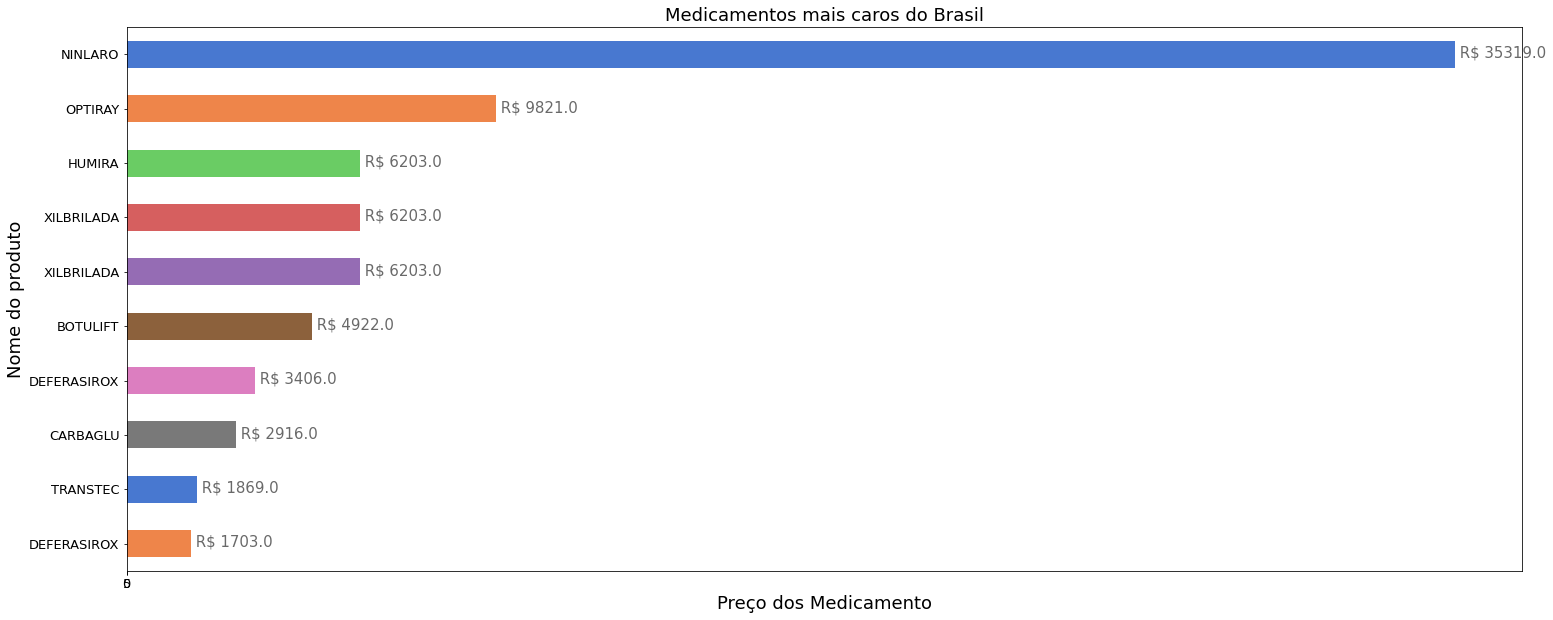

In [15]:
grafico_mais_caro = mais_caros.set_index('PRODUTO');

ax = grafico_mais_caro['PMC 18%'].plot(kind='barh',figsize=(25,10), 
                                      fontsize=13,color = sns.color_palette("muted", 8));
ax.set_alpha(0.8)
ax.set_title("Medicamentos mais caros do Brasil", fontsize=18)
ax.set_xlabel("Preço dos Medicamento", fontsize=18);
ax.set_ylabel("Nome do produto", fontsize=18);
ax.set_xticks([0, 5])


for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            " R$ "+str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
ax.invert_yaxis()


É apresentado que 8 dos 10 medicamentos mais caros são de tarja vermelha, ou seja: precisam de receita médica, pois são destinados a quadros clínicos que exigem maior cuidado e controle. Por isso, alguns precisam que a receita seja retida, pois são fármacos controlados e psicotrópicos, que podem causar dependência e trazer muitos efeitos colaterais e contraindicações.

Percebe-se 30% correspondem a produtos anti-tnf, 20% a agentes ferro-quelantes e os demais 50% a classes terapeuticas variadas. 

2. Verificar quais os 10 medicamentos mais baratos possíveis e suas respectivas substâncias, classes terapêuticas e tarjas. 

In [16]:
dados[['PRODUTO', 'SUBSTÂNCIA', 'PMC 18%', 'CLASSE TERAPÊUTICA', 'TARJA']].sort_values(by='PMC 18%', ascending=True)[0:10]

,PRODUTO,SUBSTÂNCIA,PMC 18%,CLASSE TERAPÊUTICA,TARJA
11550,NAPROXENO SÓDICO,NAPROXENO SÓDICO,2.0,M1A1 - ANTIRREUMÁTICOS NÃO ESTEROIDAIS PUROS,Tarja Venda Livre
21721,EMPROL XR,SUCCINATO DE METOPROLOL,5.0,C7A0 - BETABLOQUEADORES PUROS,NaN
4235,CLORIDRATO DE PROPRANOLOL,CLORIDRATO DE PROPRANOLOL,7.0,C7A0 - BETABLOQUEADORES PUROS,NaN
15792,BENZOL,ALBENDAZOL,7.0,P1B - ANTI-HELMÍNTICOS EXCETO ESQUISTOSSOMICID...,NaN
16996,FUROSEMIDA,FUROSEMIDA,7.0,C3A2 - DIURÉTICOS DE ALÇA PUROS,Tarja Vermelha
2666,RIVOTRIL,CLONAZEPAM,8.0,N3A - ANTIEPILÉPTICOS,Tarja Preta
9529,FLUCOL,FLUCONAZOL,10.0,J2A - AGENTES SISTÊMICOS PARA INFECÇÕES FÚNGICAS,NaN
22383,ASMAPEN,AMINOFILINA,10.0,R3B2 - ANTIASMÁTICOS/DPOC XANTÍNICOS SISTÊMICOS,NaN
9531,FLUCOL,FLUCONAZOL,10.0,J2A - AGENTES SISTÊMICOS PARA INFECÇÕES FÚNGICAS,Tarja Venda Livre
7125,CARDCOR,DIGOXINA,10.0,C1A1 - CARDIOGLICOSÍDEOS PUROS,NaN


In [17]:
mais_baratos = dados[['PRODUTO', 'LABORATÓRIO', 'PMC 18%']].sort_values(by='PMC 18%', ascending=True)[0:10]
mais_baratos

,PRODUTO,LABORATÓRIO,PMC 18%
11550,NAPROXENO SÓDICO,GERMED FARMACEUTICA LTDA,2.0
21721,EMPROL XR,ACCORD FARMACÊUTICA LTDA,5.0
4235,CLORIDRATO DE PROPRANOLOL,EMS S/A,7.0
15792,BENZOL,GREENPHARMA QUÍMICA E FARMACÊUTICA LTDA,7.0
16996,FUROSEMIDA,PRATI DONADUZZI & CIA LTDA,7.0
2666,RIVOTRIL,PRODUTOS ROCHE QUÍMICOS E FARMACÊUTICOS S.A.,8.0
9529,FLUCOL,BELFAR LTDA,10.0
22383,ASMAPEN,BRAINFARMA INDÚSTRIA QUÍMICA E FARMACÊUTICA S.A,10.0
9531,FLUCOL,BELFAR LTDA,10.0
7125,CARDCOR,LABORATÓRIO TEUTO BRASILEIRO S/A,10.0


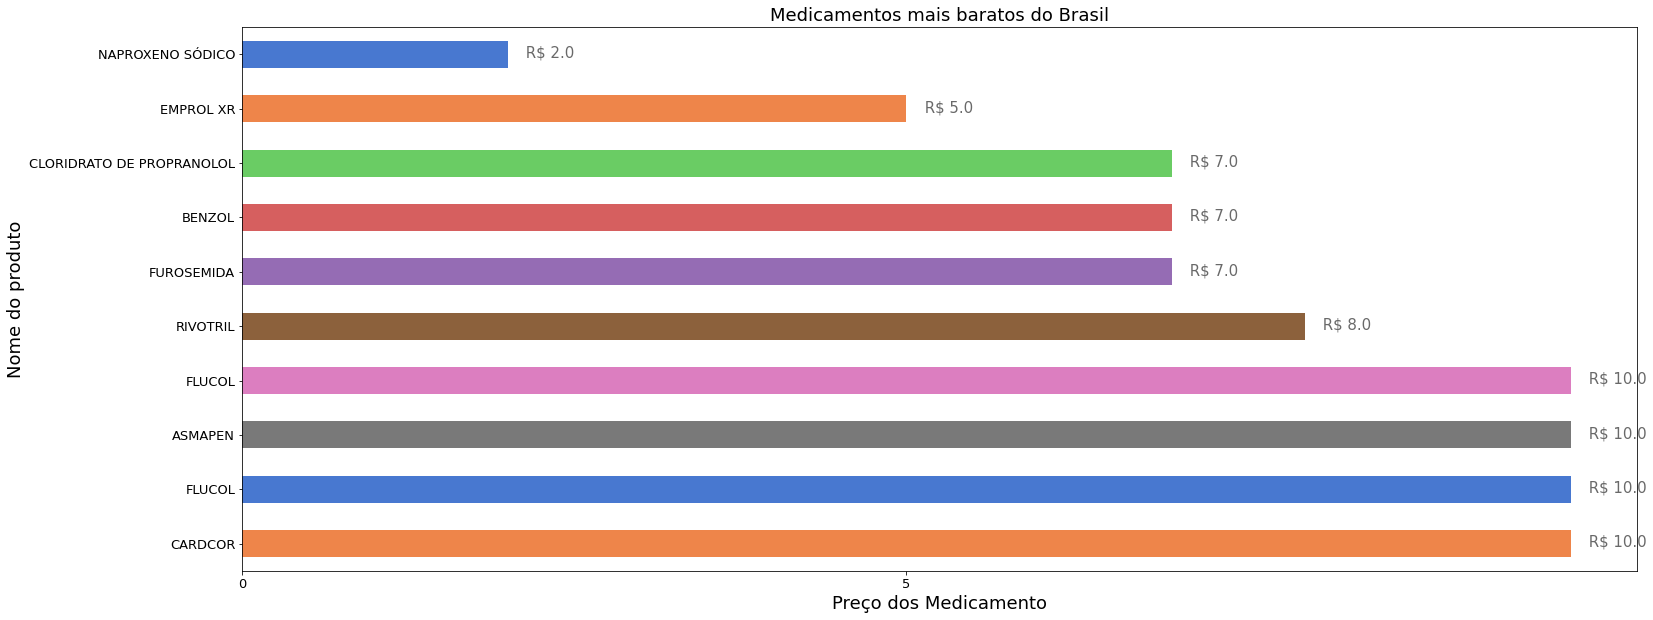

In [18]:
grafico_mais_barato = mais_baratos.set_index('PRODUTO');

ax = grafico_mais_barato['PMC 18%'].plot(kind='barh',figsize=(25,10), 
                                      fontsize=13,color = sns.color_palette("muted", 8));
ax.set_alpha(0.8)
ax.set_title("Medicamentos mais baratos do Brasil", fontsize=18)
ax.set_xlabel("Preço dos Medicamento", fontsize=18);
ax.set_ylabel("Nome do produto", fontsize=18);
ax.set_xticks([0, 5])



for i in ax.patches:

    ax.text(i.get_width()+.1, i.get_y()+.31, \
            " R$ "+str(round((i.get_width()), 2)), fontsize=15, color='dimgrey')
ax.invert_yaxis()

Dos 10 medicamentos apresentados 6 contém valor nulo para a tarja, o que representa que o medicamento não necessita de receita médica. Portanto, apenas o Rivotril e o Furosemida dependem da apresentação de receita médica. 

Não há densidade significativa de uma unica classe terapeutica, podendo considerar que são diversas. 

A variação entre os preços mais baratos é muito pequena em relação a variação entre os preços mais caros, é possivel perceber que diversos medicamentos possuem o mesmo valor, o que diminui mais ainda a variação. 